In [1]:
# import necessary libraries
import networkx as nx
import random
import matplotlib.pyplot as plt
import numpy as np

Nodes:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]

Nodes connected?
True

Nodes and Edge weights:
0 3 40
0 8 15
0 12 22
0 14 41
0 16 16
0 23 2
0 29 48
0 31 15
0 32 47
0 33 7
0 35 26
0 37 28
0 40 24
0 41 16
0 44 31
0 48 1
0 51 37
0 54 24
0 55 19
0 57 19
0 58 26
0 62 2
0 68 31
0 71 37
0 76 10
0 83 18
0 91 23
0 93 21
0 96 16
0 97 18
0 98 17
0 99 30
1 5 7
1 9 50
1 12 48
1 15 38
1 16 11
1 25 21
1 27 40
1 33 40
1 37 32
1 41 10
1 44 38
1 48 19
1 51 14
1 57 14
1 59 41
1 60 50
1 66 44
1 67 47
1 69 44
1 74 46
1 75 24
1 77 39
1 78 9
1 83 14
1 97 32
2 3 11
2 13 48
2 19 15
2 20 35
2 22 34
2 24 12
2 28 39
2 31 33
2 35 50
2 37 19
2 40 30
2 42 30
2 52 39
2 56 

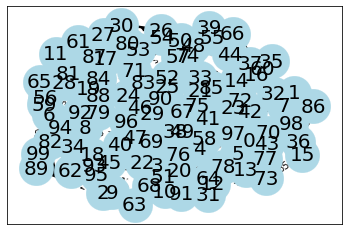

In [2]:
# Create graph with 10 nodes
seed=1000  
BaseGraph= nx.gnp_random_graph (100, .3, seed=seed )
print("Nodes:")
print(BaseGraph.nodes())

print()
print("Nodes connected?")
print(nx.is_connected(BaseGraph))

# Assign random weights to edges
print()
print("Nodes and Edge weights:")
for (u, v) in BaseGraph.edges():
    eweights=BaseGraph.edges[u,v]['weight'] = random.randint(1,50)
    print(u,v,eweights)

# some properties
print()
print("node degree and node clustering")
for v in nx.nodes(BaseGraph):
    print(f"{v} {nx.degree(BaseGraph, v)} {nx.clustering(BaseGraph, v)}")

print()
print("the adjacency list")
for line in nx.generate_adjlist(BaseGraph):
    print(line)

links = [(u, v) for (u, v, d) in BaseGraph.edges(data=True)]
pos = nx.nx_pydot.graphviz_layout(BaseGraph) 
nx.draw_networkx_nodes(BaseGraph, pos, node_size=1200, node_color='lightblue', linewidths=0.25) # draw nodes
nx.draw_networkx_edges(BaseGraph, pos, edgelist=links, width=4)                                 # draw edges

# node labels
nx.draw_networkx_labels(BaseGraph, pos, font_size=20, font_family="sans-serif")

# edge weight labels
print()
print('Graph:')
edge_labels = nx.get_edge_attributes(BaseGraph, "weight")
print(edge_labels)

#plot the graph
nx.draw_networkx_edge_labels(BaseGraph, pos, edge_labels)
print()
plt.show()

In [3]:
#calculate base weights of the graph
def calculateBaseWeights(hrsNow,minNow):
  percWeights = {}
  ModifiedGraph['Graph at '+hrsNow+minNow] = [BaseGraph.copy()]
  for (u,v) in ModifiedGraph['Graph at '+hrsNow+minNow][0].edges:
    b = baseLevelTable[hrsNow]
    p = random.normalvariate(0,0.25)
    percWeights[u,v] = round(abs(b*p*(BaseGraph.edges[u,v]['weight'])),2)
    # storing graph at all times using dictionary
    ModifiedGraph['Graph at '+hrsNow+minNow][0].edges[u,v]['weight'] = round(BaseGraph.edges[u,v]['weight'] + percWeights[u,v],2)
  # also storing their % weight changes for comparison
  ModifiedGraph['Graph at '+hrsNow+minNow].append(percWeights)

In [4]:
#generate vehicles with random source and destination
def generate_S_D(veh_Count):
  # ten vehicles for every 15 mins
  for i in range(1,11):
    x=[]
    source = random.randint(0,99)
    destination = random.randint(0,99)
    # for avoiding same source and destination nodes 
    while(source==destination):
      destination = random.randint(0,99)
    x = (source,destination)
    veh_Count+=1
    # store each vehicle info in a dictionary
    vehiclesArr['V'+ str(veh_Count)] = {'(S,D)':x}

In [5]:
 #calculate shortest paths
def calculateShortestPath(hrsNow,minNow):
  totJrnyTime = 0
  compltd_veh = []
  for i in vehiclesArr:
    tWeights = []
    pWeights = []
    graphT = ModifiedGraph['Graph at '+hrsNow+minNow]
    # If it is a new vehicle, shoretst path won't be there
    if 'Shortest Path' not in vehiclesArr[i].keys():
      vehiclesArr[i]['Shortest Path'] = nx.shortest_path(graphT[0],vehiclesArr[i]['(S,D)'][0],vehiclesArr[i]['(S,D)'][1],weight='weight',method='dijkstra')
      s_path = vehiclesArr[i]['Shortest Path']
      # store edge weights. and % weight changes
      for p in range(0,len(s_path)-1):
        if (s_path[p],s_path[p+1]) in graphT[1]:
          pWeights.append(graphT[1][(s_path[p],s_path[p+1])])
          tWeights.append(graphT[0].edges[(s_path[p],s_path[p+1])]['weight'])
        elif (s_path[p+1],s_path[p]) in graphT[1]:
          pWeights.append(graphT[1][(s_path[p+1],s_path[p])])
          tWeights.append(graphT[0].edges[s_path[p+1],s_path[p]]['weight'])
      vehiclesArr[i]['Edge weights'] = tWeights
      vehiclesArr[i]['% Weight Changes'] = pWeights
      vehiclesArr[i]['Vehicle Total Time'] = round(sum(tWeights),2)
      vehiclesArr[i]['Time interval'] = 15
    # if vehicle is already existing 
    elif(vehiclesArr[i]['Time interval']<vehiclesArr[i]['Vehicle Total Time']):
      sum_Wei=0
      pCW=vehiclesArr[i]['% Weight Changes']
      totPerInc = 0
      N=0
      tCW = vehiclesArr[i]['Edge weights']
      for j in range(len(tCW)):
        sum_Wei+=tCW[j]
        # if vehicle didn't completed its journey
        if(sum_Wei>vehiclesArr[i]['Time interval']):
          # N - node that vehicle doesn't visited so far
          N=j+1
          if(N<len(tCW)):   
            # previous each edge % weight change of the shoretst path 
            prev_sPath = vehiclesArr[i]['Shortest Path']       
            prev_pCW = vehiclesArr[i]['% Weight Changes'][N:]
            # current each edge % weight change of the shoretst path
            cur_pCW = []
            for p in range(N,len(tCW)):
              if (prev_sPath[p],prev_sPath[p+1]) in graphT[1]:
                cur_pCW.append(graphT[1][(prev_sPath[p],prev_sPath[p+1])])
              elif (prev_sPath[p+1],prev_sPath[p]) in graphT[1]:
                cur_pCW.append(graphT[1][(prev_sPath[p+1],prev_sPath[p])])
            
            # difference between current and previous overall % weight change
            totPerInc = (sum(cur_pCW)/len(cur_pCW)) - (sum(prev_pCW)/len(prev_pCW))
          break
      # if the difference is greater than 5 
      if(totPerInc>5):
        M=0
        for k in range(N,len(pCW)):
          # search for edge whose %weight change >5
          if(pCW[k]>5):
            M=k
            # recalculate shoretst path from M
            qPath = nx.shortest_path(graphT[0],vehiclesArr[i]['Shortest Path'][M],vehiclesArr[i]['(S,D)'][1],weight='weight',method='dijkstra')
            vehiclesArr[i]['Shortest Path'][M:] = qPath
            
            # update each edge weight and %weight change from node M
            s_path = vehiclesArr[i]['Shortest Path']
            for p in range(M,len(s_path)-1):
              if (s_path[p],s_path[p+1]) in graphT[1]:
                pWeights.append(graphT[1][(s_path[p],s_path[p+1])])
                tWeights.append(graphT[0].edges[(s_path[p],s_path[p+1])]['weight'])
              elif (s_path[p+1],s_path[p]) in graphT[1]:
                pWeights.append(graphT[1][(s_path[p+1],s_path[p])])
                tWeights.append(graphT[0].edges[s_path[p+1],s_path[p]]['weight'])
            vehiclesArr[i]['Edge weights'][M:] = tWeights
            vehiclesArr[i]['% Weight Changes'][M:] = pWeights
            # each vehicles total travel time
            vehiclesArr[i]['Vehicle Total Time'] = round(sum(vehiclesArr[i]['Edge weights']),2)
            break;
      # time interval for comparing how much time has already passed since the vehicle started its journey
      vehiclesArr[i]['Time interval'] +=15

    # if vehicle completed its journey      
    elif(vehiclesArr[i]['Time interval']>vehiclesArr[i]['Vehicle Total Time']):
      vehiclesArr[i]['Time interval'] = vehiclesArr[i]['Vehicle Total Time']
      #store total journey time
      totJrnyTime += round(vehiclesArr[i]['Vehicle Total Time'],2) # rounded to 2 digits after decimal point for ease
      compltd_veh.append(i)
    else:
      continue
  # and return it for adding to all vehicles total journey time
  return totJrnyTime,compltd_veh

In [6]:
baseLevelTable = {'12AM':0.1,'01AM':0.1,'02AM':0.1,'03AM':0.15,'04AM':0.25,'05AM':0.3,'06AM':0.65,'07AM':0.85,
                  '08AM':1.0,'09AM':0.95,'10AM':0.9,'11AM':0.9,'12PM':0.9,'01PM':0.9,'02PM':0.95,'03PM':0.95,
                  '04PM':0.9,'05PM':1.0,'06PM':1.0,'07PM':0.85,'08PM':0.7,'09PM':0.6,'10PM':0.45,'11PM':0.3,} 
# store all vehicle details
vehiclesArr = {}
# store all times gragh details
ModifiedGraph = {}

# store hrs
hrsNow = ''
# store mins
minNow = ''

#Start the map
def Start_Maps():
  # count of vehicles
  veh_Count=0
  # count of all completd vehicles journey time
  totJrnyTime = 0
  for item in baseLevelTable.keys():
    hrsNow = item
    t_interval = 00
    while(t_interval<=45):
      if (t_interval%15==0):
        minNow = str(t_interval).zfill(2)
        #calculate base weights of the graph
        calculateBaseWeights(hrsNow,minNow)
        #generate vehicles with random source and destination
        generate_S_D(veh_Count)
        #calculate shortest paths
        jT, comp_Veh = calculateShortestPath(hrsNow,minNow)
        totJrnyTime+= round(jT,2)
        # pop out vehicles that completed their journey due to memory constraints
        for x in comp_Veh:
          vehiclesArr.pop(x)
        # print(f"Journey completed vehicles: {comp_Veh}")
        # print("New and incomplete journey vehicles:")
        # print(f"{hrsNow[:2]}:{minNow} {hrsNow[2:]} {vehiclesArr}")
        veh_Count+=10
      t_interval+=1
  print(f"Total Journey time: {totJrnyTime}")  
Start_Maps()

Total Journey time: 9800.390000000003
